In [49]:
##Import Libarires
import numpy as np #for numerical purposes
import pandas as pd #for handling dataset

import seaborn as sns  #for making charts and plots
import matplotlib.pyplot as plt #basic plotting library

from sklearn.model_selection import train_test_split # split data in to training and testng sets

from sklearn.pipeline import Pipeline,make_pipeline #pipeline: rin preprocessing and model in one step

##Model Selection / Hyperparameter tuning
from sklearn.model_selection import cross_val_score 

from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score , f1_score , classification_report


import joblib # save trained model to a file an dload it later 


In [50]:
df = pd.read_csv('emails.csv')
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [51]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [52]:
df.iloc[0, :]['text']

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [54]:
print(df.isna().sum()) #count of missing value
dp = df.dropna() # delete the row with na value

text    0
spam    0
dtype: int64


In [55]:
print(df.duplicated().sum())# count of the duplicate value
df.drop_duplicates(inplace = True) # remove all the duplicate rows
df.reset_index(inplace=True , drop = True)# remove the un-needed indexes after deleting the duplicated rows

33


In [56]:
df.duplicated().sum()

np.int64(0)

In [57]:
counts = df['spam'].value_counts() #count how many emails belong to each class : 0 = not spam , 1 = spam

percentage = df['spam'].value_counts(normalize=True) * 100 # calculate the percent of spam and not spam mails

print("counts: \n" , counts)
print("\npercentage:\n",percentage)

counts: 
 spam
0    4327
1    1368
Name: count, dtype: int64

percentage:
 spam
0    75.978929
1    24.021071
Name: proportion, dtype: float64


In [58]:
#create a new column 'length' with the character count of each email
df['length'] = df['text'].apply(len)

#statistics of email length by class
length_stats = df.groupby('spam')['length'].describe()
print('\nStatistics of Email length by Class: \n')
print(length_stats)


Statistics of Email length by Class: 

       count         mean          std   min    25%     50%      75%      max
spam                                                                         
0     4327.0  1634.200139  1965.016383  13.0  577.5  1122.0  2037.50  43952.0
1     1368.0  1317.257310  2271.372893  18.0  401.5   693.5  1250.25  28432.0


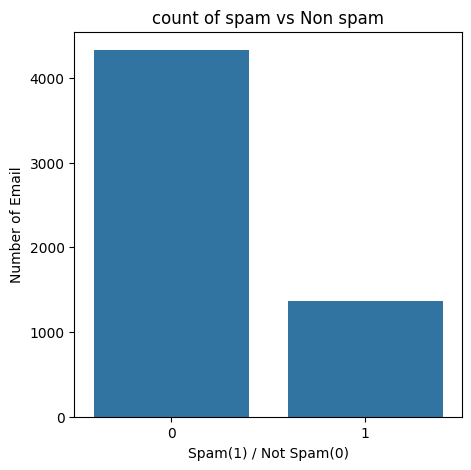

In [59]:
df['email_length'] = df['text'].str.len()

#1) Bar chart: Count of spam vs non- spam
sns.countplot(x = df['spam'])
plt.title("count of spam vs Non spam")
plt.xlabel("Spam(1) / Not Spam(0)")
plt.ylabel("Number of Email")
plt.show()

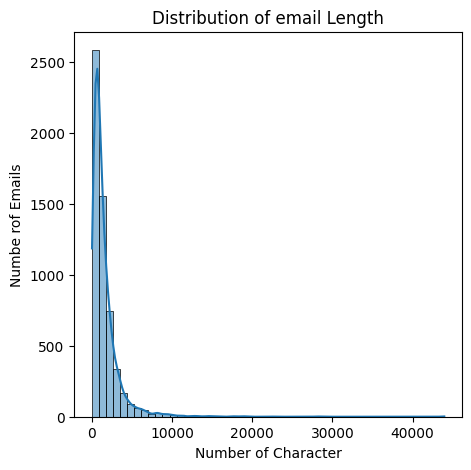

In [60]:
#2) Histogram : Shows how email length are spread out
sns.histplot(df['email_length'] , bins = 50 , kde=True)
plt.title("Distribution of email Length")
plt.xlabel("Number of Character")
plt.ylabel("Numbe rof Emails")
plt.show()

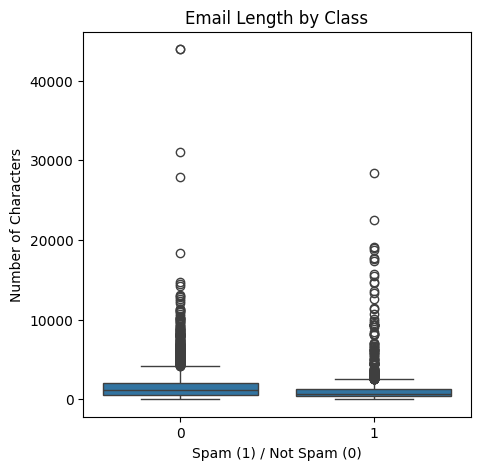

In [61]:
#3) Bar plot : Email length by class
sns.boxplot(x='spam' , y = 'email_length' , data = df)
plt.title("Email Length by Class")
plt.xlabel("Spam (1) / Not Spam (0)")
plt.ylabel("Number of Characters")
plt.show()

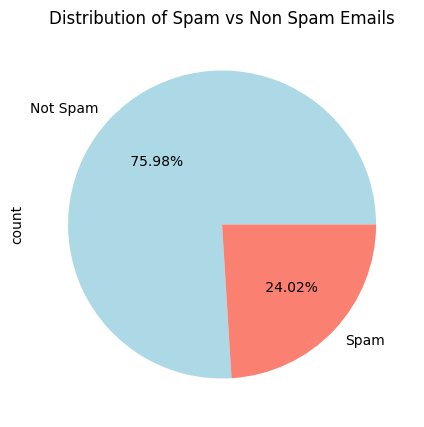

In [62]:
# Pie Chart : How many spam and non spam emails
spread = df['spam'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

#Make the pie chart
spread.plot(kind='pie',labels=['Not Spam' , 'Spam'] , autopct= ' %1.2f%%' , colors=['lightblue','salmon'])
plt.title("Distribution of Spam vs Non Spam Emails")
plt.show()

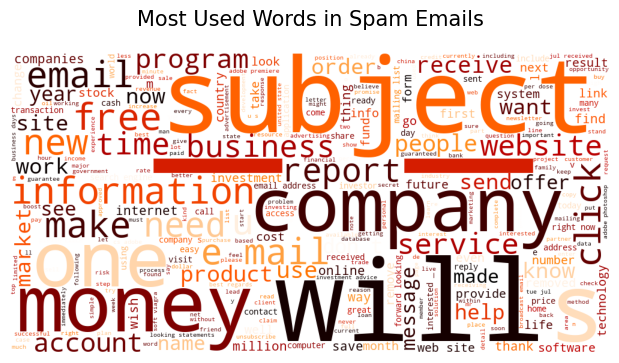

In [63]:
# WordCloud for Most used Words in Spam Mails
from wordcloud import WordCloud , STOPWORDS

#check only spam emails
df_spam = df[df['spam'] == 1].copy()

#Make a big string of all words in spam emails
comment_words = ''

#words to ignore (like 'the' , 'and' , 'is')
stopwords = set(STOPWORDS)

#Go through each spam email
for val in df_spam['text']:
    val = str(val) #make sure it is text
    tokens = val.split() # split into separate words
    tokens = [word.lower() for word in tokens] #make all words lower case
    comment_words += " ".join(tokens)+" " #add words to big string

# Making the word cloud picture
wordcloud = WordCloud(
    width=1000 , height = 500,
    background_color = 'white',
    stopwords = stopwords,
    min_font_size=10,
    max_words=1000,
    colormap = 'gist_heat_r'
).generate(comment_words)

# Show the word cloud
plt.figure(figsize=(6,6))
plt.title('Most Used Words in Spam Emails', fontsize=15, pad=20)
plt.imshow(wordcloud)  # show image
plt.axis("off")         # hide axes
plt.tight_layout(pad=0)
plt.show()



In [64]:
#X is the email text (features), y is the label (spam or not)
x = df['text']
y = df['spam']

#Split the emials and labels into training (80%) and test(20%) sets

x_train , x_test, y_train,y_test = train_test_split(x,y, test_size= 0.2 , shuffle = True , stratify=y , random_state = 42)

#Checks the number of samples in training and testing sets

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4556,), (1139,), (4556,), (1139,))

In [65]:
#check for missing value 
print(x_train.isna().sum)

<bound method Series.sum of 3549    False
4173    False
1951    False
568     False
2922    False
        ...  
2098    False
4109    False
765     False
2190    False
2010    False
Name: text, Length: 4556, dtype: bool>


In [66]:
##Tranform email Text to machine readable numbers

#Import TF-IDF vectorizer, which converts text into number that a model can understand

from sklearn.feature_extraction.text import TfidfVectorizer

#Turns text into nummbers , lowercase words , remove common words and use single words only

tfidf_vectorizer = TfidfVectorizer(encoding='utf-8' , lowercase  = True, analyzer='word' , stop_words='english' , ngram_range=(1,1) , norm='l2')


#learn the words from training emails and covert them into numbers.
data = tfidf_vectorizer.fit_transform(x_train)

#convert training number into  table wih column named after learned words
x_train_preprocessed = pd.DataFrame(data.todense() , columns = tfidf_vectorizer.get_feature_names_out())

data = tfidf_vectorizer.transform(x_test)

x_test_preprocesssed = pd.DataFrame(data.todense() , columns = tfidf_vectorizer.get_feature_names_out())


x_train_preprocessed



,00,000,0000,000000,00000000,0000000000,000000000003619,000000000003991,000000000003997,000000000005168,000000000005411,000000000005412,000000000005413,000000000005820,000000000006238,000000000006452,000000000007494,000000000007498,000000000007876,000000000010552,000000000011185,000000000012677,000000000012736,000000000012738,000000000012741,000000000012987,000000000013287,000000000015384,000000000015793,000000000024099,000000000025307,000000000025312,0000102789,0000104281,0000104282,0000107043,0000108729,000066,0001,000166,...,zoraidaguerra,zorganizowalem,zosta,zostal,zou,zrobic,zrobilem,zt,ztvwo,zu,zuerich,zufferli,zuid,zulie,zulkifli,zum,zuma,zunaechst,zungenakrobatik,zur,zurich,zusaetzlich,zustellstatus,zuyw,zuzana,zwabic,zwischen,zwlaszcza,zwrocic,zwwyw,zwzm,zxghlajf,zyban,zyc,zygoma,zymg,zzmacmac,zzn,zzncacst,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.040566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.040566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [67]:
print(x_train_preprocessed.shape)
x_test_preprocesssed.shape


(4556, 33396)


(1139, 33396)

In [68]:
#Now to implement Model

from sklearn.linear_model import LogisticRegression

logestic_clf = LogisticRegression(C=1,class_weight = 'balanced' , max_iter=100,random_state=42)
logestic_clf.fit(x_train_preprocessed,y_train)


LogisticRegression(C=1, class_weight='balanced', random_state=42)

In [69]:
##Now for Training dataset Scores

from sklearn.model_selection import cross_val_score, cross_val_predict

print(f"Train Accuracy: {logestic_clf.score(x_train_preprocessed, y_train)}")

# Convert both X and y to raw numpy arrays
val_scores = cross_val_score(logestic_clf, x_train_preprocessed.values, y_train, cv=5)
print(f"Validation Accuracy: {np.mean(val_scores)}")

Train Accuracy: 0.9940737489025461
Validation Accuracy: 0.9855145203843858


In [70]:
##Now Training dataset cross-Validation Metrics

from sklearn.metrics import confusion_matrix , precision_score,recall_score, f1_score

y_valid_pred = cross_val_predict(logestic_clf , x_train_preprocessed , y_train, cv=3)
print(f"Valid Accuracy: {accuracy_score(y_train, y_valid_pred)})")
print(f"Valid Precision: {precision_score(y_train, y_valid_pred)}")
print(f"Valid recall: {recall_score(y_train, y_valid_pred)}")
print(f"Valid f1: {f1_score(y_train, y_valid_pred)}")

cm = confusion_matrix(y_train,y_valid_pred)
print(cm)

Valid Accuracy: 0.9846356453028973)
Valid Precision: 0.9429065743944637
Valid recall: 0.9963436928702011
Valid f1: 0.9688888888888889
[[3396   66]
 [   4 1090]]


In [71]:
##Testing Model Prediction on the Test Set

y_test_pred = logestic_clf.predict(x_test_preprocesssed.values)
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f"Test Precision: {precision_score(y_test, y_test_pred)}")
print(f"Test Recall: {recall_score(y_test, y_test_pred)}")
print(f"Test F1: {f1_score(y_test, y_test_pred)}")

cm = confusion_matrix(y_test, y_test_pred)
print(cm)


Test Accuracy: 0.990342405618964
Test Precision: 0.9614035087719298
Test Recall: 1.0
Test F1: 0.9803220035778175
[[854  11]
 [  0 274]]


c:\Users\ayush\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [72]:
##Automatic Text Transformation and Spam Prediction

logestic_pipe = Pipeline([
    ('tf_idf' , tfidf_vectorizer),
    ('model' , logestic_clf),
])
logestic_pipe

Pipeline(steps=[('tf_idf', TfidfVectorizer(stop_words='english')),
                ('model',
                 LogisticRegression(C=1, class_weight='balanced',
                                    random_state=42))])

In [73]:
new_email = ["You won a free iphone! "]
prediction = logestic_pipe.predict(new_email)
if(prediction):
    print('Mail is a spam')
else:
    print('not a spam')

Mail is a spam


c:\Users\ayush\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
